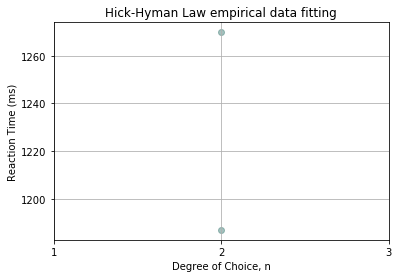

stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are still!
stimuli are 

In [1]:
# ============================================================================
# Author  : Jiayao Yu, User Interfaces Group, Aalto University
# Init    : August, 2017
# Project : ELEC-D7010 Engineering for Humans course materials
# Topic   : Hick-Hyman Law
# ============================================================================

import tkinter as tk
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import random
import time as tm

class ExpAccurate(tk.Frame):
	# initial parameters
	gameAreaHeight = 300
	stimuliBasePosition = [200, -30]
	stimuliSideLength = 30
	stimuliFontSize = 20
	stimuliKey = ['S', 'L', 'E', 'I', 'R', 'U', 'G', 'H']
	stimuliTotalAmount = 8
	timeStart = []                                  # list of timestamp when generating each stimulus
	timeHit = []                                    # list of timestamp when hit each correct key
	timeDelta = []                                  # list of reaction time in millisecond
	plotTimeXList = []                              # list of stimuli amount as abscissa in plot RT ~ f(N)
	counterMax = 10                                  # to limit repeating times of hit-key experiment for a certain stimuli set size
	flagPause = False
	flagTransit = False
	flagStart = False

	def __init__(self, parent=None):
		tk.Frame.__init__(self, parent)
		self.pack()
		self.makeWidgets()
		self.defStimuliCollection()
		self.stimuliAmount = 2						# initial stimuli amount
		self.counter = 0							# to record repeating times of hit-key experiment so far

		self.flagStart = False
		self.flagPause = False
		self.flagTransit = False

		self.bind_all('<space>', self.start)		# press <space> to start the experiment

	def makeWidgets(self):
		self.frameExplain = tk.Frame(self)
		self.frameGameArea = tk.Canvas(self, bd=2, bg='white', relief=tk.GROOVE, width=500, height=self.gameAreaHeight)
		self.frameControlPanel = tk.Frame(self)

		self.frameExplain.grid(row=0, column=0, padx=10, pady=10)
		self.frameGameArea.grid(row=1, column=0, padx=10, pady=10)
		self.frameGameArea.grid_propagate(0)
		self.frameControlPanel.grid(row=0, rowspan=2, column=1, padx=10, pady=10)
		
		self.labelPause = tk.Label(self.frameExplain, text="Press <SPACE> key to START")
		# stimuli hints
		self.stimuliHints = [0 for x in range(8)]
		for x in range(8):
			self.stimuliHints[x] = tk.Label(self.frameExplain, text=self.stimuliKey[x], relief=tk.GROOVE, width=5)
		self.labelRequirement = tk.Label(self.frameControlPanel, text="If checked, stimuli are dropping, otherwise they are still", wraplength=200)
		# toggle stimuli dropping animation
		self.varToggle = tk.IntVar()
		self.btnToggleMode = tk.Checkbutton(self.frameControlPanel, text="Stimuli animation", variable=self.varToggle, command=self.toggleDropping)
		self.btnPreload = tk.Button(self.frameControlPanel, text="Preload Dataset")
		self.btnFilter = tk.Button(self.frameControlPanel, text="Filter Outliers")

		self.labelPause.grid(row=0, column=0, columnspan=8, padx=10, sticky=tk.W)
		self.stimuliHints[0].grid(row=2, column=0, sticky=tk.NSEW, padx=10, pady=10)
		self.stimuliHints[1].grid(row=2, column=7, sticky=tk.NSEW, padx=10, pady=10)
		self.stimuliHints[2].grid(row=1, column=1, sticky=tk.NSEW, padx=10, pady=10)
		self.stimuliHints[3].grid(row=1, column=6, sticky=tk.NSEW, padx=10, pady=10)
		self.stimuliHints[4].grid(row=1, column=2, sticky=tk.NSEW, padx=10, pady=10)
		self.stimuliHints[5].grid(row=1, column=5, sticky=tk.NSEW, padx=10, pady=10)
		self.stimuliHints[6].grid(row=2, column=3, sticky=tk.NSEW, padx=10, pady=10)
		self.stimuliHints[7].grid(row=2, column=4, sticky=tk.NSEW, padx=10, pady=10)
		self.labelRequirement.grid(row=0, column=0, padx=10, pady=10)
		self.btnPreload.grid(row=2, column=0, sticky=tk.NSEW, padx=10, pady=10)
		self.btnToggleMode.grid(row=1, column=0, sticky=tk.NSEW, padx=10, pady=10)
		self.btnFilter.grid(row=3, column=0, sticky=tk.NSEW, padx=10, pady=10)

		self.btnPreload.bind('<ButtonRelease-1>', self.preload)
		self.btnFilter.bind('<ButtonRelease-1>', self.filter)

	def defStimuliCollection(self):
		self.stimuli = [0 for x in range(8)]
		self.stimuliTexts = [0 for x in range(8)]
		for x in range(8):
			self.stimuli[x] = self.frameGameArea.create_rectangle(self.stimuliBasePosition[0], self.stimuliBasePosition[1], self.stimuliBasePosition[0] + self.stimuliSideLength, self.stimuliBasePosition[1] + self.stimuliSideLength, fill='#C0FFF8', activefill='#63B2A9', tags=self.stimuliKey[x], state=tk.HIDDEN)
			self.stimuliTexts[x] = self.frameGameArea.create_text(self.stimuliBasePosition[0] + 0.5*self.stimuliSideLength, self.stimuliBasePosition[1] + 0.5*self.stimuliSideLength, text=self.stimuliKey[x], font=self.stimuliFontSize, tags=self.stimuliKey[x], state=tk.HIDDEN)

	def start(self, event):
		self.flagStart = True
		self.generateStimuliSet(self.stimuliAmount)
		self.bind_all('<KeyPress>', self.onKeyHit)
		self.bind_all('<space>', self.pauseResume)

	def generateStimuliSet(self, argAmount):
		self.flagTransit = True
		self.indexList = []				# currently activated indices of stimuli
		for i in range(argAmount):
			self.indexList.append(i)
			self.stimuliHints[i].config(relief=tk.RAISED, bg='#63B2A9', fg='white')
		self.speed = 5
		self.counterTransit = 0
		self.transitStimuliSet()

	def transitStimuliSet(self):
		# blink updated stimuli set twice
		if self.counterTransit < 4:
			if self.stimuliHints[0].cget('state') == tk.NORMAL:
				for i in range(self.stimuliAmount):
					self.stimuliHints[i].config(state=tk.DISABLED, bg='SystemButtonFace', relief=tk.GROOVE)
			else:
				for i in range(self.stimuliAmount):
					self.stimuliHints[i].config(state=tk.NORMAL, bg='#63B2A9', relief=tk.RAISED)
			self.counterTransit += 1
			self.frameGameArea.after(500, self.transitStimuliSet)
		else:
			self.frameGameArea.after(1500, self.generateRandomStimuli(self.indexList))

	def generateRandomStimuli(self, argIndexList):
		self.indexCurrent = random.sample(argIndexList, 1)
		self.frameGameArea.itemconfigure(self.stimuli[self.indexCurrent[0]], state=tk.NORMAL)
		self.frameGameArea.itemconfigure(self.stimuliTexts[self.indexCurrent[0]], state=tk.NORMAL)
		self.frameGameArea.coords(self.stimuli[self.indexCurrent[0]], self.stimuliBasePosition[0], self.stimuliBasePosition[1], self.stimuliBasePosition[0] + self.stimuliSideLength, self.stimuliBasePosition[1] + self.stimuliSideLength)
		self.frameGameArea.coords(self.stimuliTexts[self.indexCurrent[0]], self.stimuliBasePosition[0] + 0.5*self.stimuliSideLength, self.stimuliBasePosition[1] + 0.5*self.stimuliSideLength)

		self.flagTransit = False
		if self.flagStart == True:
			self.animateStimuli()
			self.flagStart = False
		# record the timestamp when generating this stimulus
		self.timeStart.append(tm.clock())

	# animate the dropping of stimuli 
	def animateStimuli(self):
		# press <space> can pause/resume animateStimuli()
		if self.flagPause == False:
			if self.flagTransit == False:
				if self.varToggle.get() == 1:
					if self.frameGameArea.coords(self.stimuli[self.indexCurrent[0]])[1] > self.gameAreaHeight + 3:
						if self.counter < self.counterMax - 1:
							self.generateRandomStimuli(self.indexList)
							self.counter += 1
						else:
							if self.stimuliAmount < 8:
								self.counter = 0
								self.stimuliAmount += 1
								self.generateStimuliSet(self.stimuliAmount)
							else:
								self.flagPause = True
								self.expEnd()
					else:	
						self.frameGameArea.move(self.stimuli[self.indexCurrent[0]], 0, self.speed)
						self.frameGameArea.move(self.stimuliTexts[self.indexCurrent[0]], 0, self.speed)
				else:
					print("stimuli are still!")
			self.frameGameArea.after(20, self.animateStimuli)


	def onKeyHit(self, event):
		if self.flagPause == False:
			self.indexHit = []
			if event.char == self.stimuliKey[self.indexCurrent[0]] or event.char == self.stimuliKey[self.indexCurrent[0]].lower():
				self.indexHit.append(self.indexCurrent[0])
				self.timeHit.append(tm.clock())
				self.timeDelta.append((self.timeHit[-1] - self.timeStart[-1])*1000)
				self.plotTimeXList.append(self.stimuliAmount)
				self.frameGameArea.itemconfigure(self.stimuli[self.indexCurrent[0]], fill='#63B2A9')
				self.flagPause = True
				self.flagTransit = True
				self.frameGameArea.after(300, self.afterCorrectKeyHit)

	def afterCorrectKeyHit(self):
		self.flagTransit = False
		self.frameGameArea.itemconfigure(self.stimuli[self.indexCurrent[0]], state=tk.HIDDEN, fill='#C0FFF8')
		self.frameGameArea.itemconfigure(self.stimuliTexts[self.indexCurrent[0]], state=tk.HIDDEN)
		self.flagPause = False
		self.animateStimuli()
		# repeat generateRandomStimuli()
		if self.counter < self.counterMax - 1:
			self.generateRandomStimuli(self.indexList)
			self.counter += 1
			# plot reaction time against stimuli set size
			fig = plt.figure()
			graph = fig.add_subplot(1,1,1)
			graph.set(title="Hick-Hyman Law empirical data fitting", ylabel="Reaction Time (ms)", xlabel="Degree of Choice, n")
			graph.scatter(self.plotTimeXList, self.timeDelta, color='#4A857E', alpha=0.5)
			plt.xticks(range(min(self.plotTimeXList)-1, max(self.plotTimeXList)+2, 1))
			plt.grid()
			display.clear_output(wait=True)
			plt.show()
		else:
			# increase the size of stimuli set
			if self.stimuliAmount < 8:
				self.counter = 0
				self.stimuliAmount += 1
				self.generateStimuliSet(self.stimuliAmount)
			else:
				self.flagPause = True
				self.expEnd()

	def pauseResume(self, event):
		if self.flagTransit == False:
			self.flagPause = not self.flagPause
			self.animateStimuli()
			if self.flagPause == True:
				self.labelPause.config(text="Press <SPACE> key to CONTINUE")
			else:
				self.labelPause.config(text="Press <SPACE> key to PAUSE at any time")


	def expEnd(self):
		self.unbind_all('<KeyPress>')
		# plot reaction time against stimuli set size
		fig1 = plt.figure(1)
		graphRT = fig1.add_subplot(1,1,1)
		graphRT.set(title="Hick-Hyman Law empirical data fitting", ylabel="Reaction Time (ms)", xlabel="Degree of Choice, n")
		graphRT.scatter(self.plotTimeXList, self.timeDelta, color='#4A857E', alpha=0.5)
		plt.xticks(range(min(self.plotTimeXList)-1, max(self.plotTimeXList)+2, 1))
		plt.grid()	
		# Hick-Hyman Law empirical data fitting
		plotTimeXLogList = np.log2(self.plotTimeXList)
		z = np.polyfit(plotTimeXLogList, self.timeDelta, 1)
		f = np.poly1d(z)
		plotTimeXArray = np.array(self.plotTimeXList)
		x = np.arange(plotTimeXArray.min(), plotTimeXArray.max(), 0.1)
		xLog = np.log2(x)
		y = f(xLog)
		plt.plot(x, y)
		display.clear_output(wait=True)
		plt.show()
		print ("Experiment is Done!")

	def preload(self, event):
		print("preload()")

	def filter(self, event):
		print("filter()")

	def toggleDropping(self):
		if self.varToggle.get() == 1:
			print("toggleDropping()")
		

if __name__ == "__main__":
	root = tk.Tk()
	root.title("Hick-Hyman Law Experiment")
	ExpAccurate(root).mainloop()
